# K - Nearest Neighbors
## Aditya Bagad

### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### About dataset

Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset,  with predefined labels, we need to build a model to be used to predict class of a new or unknown case. 

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns. 

The target field, called __custcat__, has four possible values that correspond to the four customer groups, as follows:
  1- Basic Service
  2- E-Service
  3- Plus Service
  4- Total Service

Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.

### Reading the dataset

In [2]:
dataFrame = pd.read_csv('teleCust.csv')

In [3]:
dataFrame.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [4]:
dataFrame.shape

(1000, 12)

In [5]:
dataFrame.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


In [6]:
dataFrame['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025D56AC0438>]],
      dtype=object)

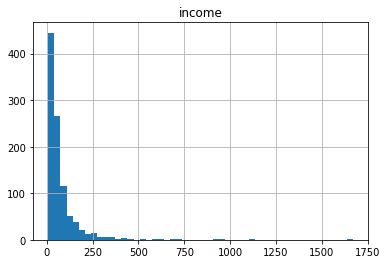

In [7]:
dataFrame.hist(column='income', bins=50)

In [8]:
dataFrame.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

### Splitting into features and lables

In [9]:
# Features
X = dataFrame.iloc[:, 0:-1]
X.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
0,2,13,44,1,9,64.0,4,5,0.0,0,2
1,3,11,33,1,7,136.0,5,5,0.0,0,6
2,3,68,52,1,24,116.0,1,29,0.0,1,2
3,2,33,33,0,12,33.0,2,0,0.0,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4


In [10]:
# Labels
y = dataFrame.iloc[:, -1]
y.head()

0    1
1    4
2    3
3    1
4    3
Name: custcat, dtype: int64

### Normalize the Data

In [11]:
from sklearn import preprocessing

X = preprocessing.StandardScaler().fit_transform(X.astype(float))

In [12]:
print(X)

[[-0.02696767 -1.055125    0.18450456 ... -0.22207644 -1.03459817
  -0.23065004]
 [ 1.19883553 -1.14880563 -0.69181243 ... -0.22207644 -1.03459817
   2.55666158]
 [ 1.19883553  1.52109247  0.82182601 ... -0.22207644  0.96655883
  -0.23065004]
 ...
 [ 1.19883553  1.47425216  1.37948227 ... -0.22207644  0.96655883
  -0.92747794]
 [ 1.19883553  1.61477311  0.58283046 ... -0.22207644  0.96655883
  -0.92747794]
 [ 1.19883553  0.67796676 -0.45281689 ... -0.22207644  0.96655883
   0.46617787]]


### Split the data into Training and Testing

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [14]:
print ('Train set:', X_train.shape,  y_train.shape)

Train set: (800, 11) (800,)


In [15]:
print ('Test set:', X_test.shape,  y_test.shape)

Test set: (200, 11) (200,)


### Modeling

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 4)

In [17]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

### Predictions

In [18]:
y_pred = knn.predict(X_test)

In [19]:
y_pred[0:5]

array([1, 1, 3, 2, 4], dtype=int64)

### Accuracy Score

In [20]:
from sklearn import metrics

print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Test set Accuracy:  0.32


### Modeling with differnet parameters ( Neighbors = 6 )

In [21]:
knn6 = KNeighborsClassifier(n_neighbors = 6).fit(X_train, y_train)

In [22]:
y_pred_6 = knn6.predict(X_test)

In [23]:
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred_6))

Test set Accuracy:  0.31


### Calucalting the accuracy of KNN for different K's.

In [24]:
no_of_neighbors = 10
accuracy = []

for n in range(1, no_of_neighbors):    
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, y_pred))

In [25]:
accuracy

[0.3, 0.29, 0.315, 0.32, 0.315, 0.31, 0.335, 0.325, 0.34]

### Accuracy Graph

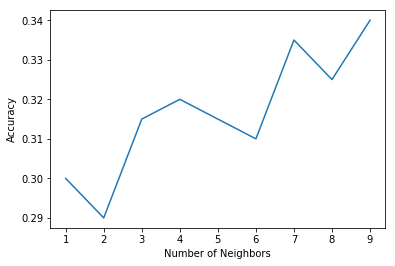

In [26]:
plt.plot(range(1, no_of_neighbors), accuracy)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()